In [1]:
using InstantiateFromURL
activate_github("QuantEcon/QuantEconLecturePackages", tag = "v0.9.0");
using LinearAlgebra, Statistics, Compat, Plots, Parameters

######################################################################### 100.0%


Instantiating /home/jupyter/ECON628A/.projects/QuantEconLecturePackages-v0.9.0
  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Precompiling project...


ols() = [0.0785128, 0.211812, 0.517804, 1.00018, 0.0946646]


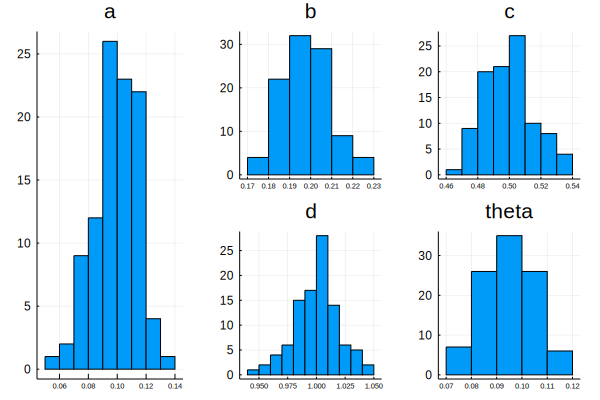

In [2]:
parameters=(a=0.1,b=0.2,c=0.5,d=1.0,σ=0.1,n=50,k=5,m=100) # k=# of parameters; set m=100 to have more reps.
n_parameters=["a", "b", "c", "d","theta", "n", "np", "m"]

function simulation() #Simulate the data
    @unpack a,b,c,d,σ,n,k= parameters
    beta=[a, b ,c, d, σ]
    x1=randn(n)
    x2=randn(n)
    x=[x1 x1.^2 x2 ones(n)]
    w=randn(n)
    y=x*beta[1:k-1]+beta[k]*w
    return(y=y, x=x)
end

function ols() #Calculates OLS using simulated data
    @unpack n,k= parameters
    y,x=simulation() #Possible to include other dataset
    β=zeros(k)
    β[1:k-1]=x'x\x'y #Estimation of coefficients
    β[k]=sqrt(sum((y-x*β[1:k-1]).^2)/(n-1)) #Estimates variance of errors
    return β
end

@show ols() #just to check

function rep_p()
    @unpack n,k,m= parameters
    β_m=zeros(k,m) #Matrix to storage results, with m repitition. Each repitition is a column
    [β_m[:,i]=ols() for i in 1:m]
    return β_m
end


l = @layout [  a{0.3w} [b{0.5h} c{0.5h}; #To deal with 5 subplots
                         d{0.5h} e{0.5h}]]

function hist_p(y) #Histrogram of parameters
    @unpack k= parameters
    histogram([y[p,:] for p in 1:k], layout=l,
    title = ["$(n_parameters[p])" for j = 1:1, p=1:k], legend=false, xtickfont = font(5))
end

hist_p(rep_p()) #Histrogram of parameters, values obtaiend from m repetitions of the estimation